In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date as dt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import *
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import pickle
import warnings
warnings.filterwarnings('ignore')

In [256]:
flight = pd.read_csv('Flight_price_dataset.csv')
flight

,Unnamed: 0,Flight,Date,Duration,Source,Destination,Departure,Arrival,Stops,Meal,Price
0,0,SpiceJet,29/09/2022,2h 30m,New Delhi,Bangalore,20:00,22:30,Non Stop,No Meal,7419
1,1,SpiceJet,29/09/2022,2h 50m,New Delhi,Bangalore,6:05,8:55,Non Stop,No Meal,7419
2,2,Air India,29/09/2022,2h 50m,New Delhi,Bangalore,21:15,0:05,Non Stop,Free Meal,7425
3,3,Air Asia,29/09/2022,5h 30m,New Delhi,Bangalore,15:30,21:00,1 Stop,No Meal,7710
4,4,Air Asia,29/09/2022,6h 15m,New Delhi,Bangalore,8:00,14:15,1 Stop,No Meal,7710
...,...,...,...,...,...,...,...,...,...,...,...
1626,1626,Vistara,02/10/2022,1h 55m,Mumbai,New Delhi,12:25,14:20,Non Stop,Available,5943
1627,1627,Vistara,02/10/2022,2h 5m,Mumbai,New Delhi,6:30,8:35,Non Stop,Available,5943
1628,1628,Vistara,02/10/2022,2h 5m,Mumbai,New Delhi,7:30,9:35,Non Stop,Available,5943
1629,1629,Vistara,02/10/2022,2h 15m,Mumbai,New Delhi,21:55,0:10,Non Stop,Available,5943


    Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the
    same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight
    ticket prices are so unpredictable.

## FEATURES:

- Flight: The name of the airline.
- Date: The date of the journey
- Duration: Total duration of the flight.
- Source: The source from which the service begins.
- Destination: The destination where the service ends.
- Departure: The time when the journey starts from the source.
- Arrival: Time of arrival at the destination.
- Stops: Total stops between the source and destination.
- Meal: Meal will be their during the journey or not.

## TARGET:

- Price: The price of the ticket

In [257]:
flight.drop('Unnamed: 0', axis = 1, inplace = True)

Dropping the unwanted columns.

In [258]:
flight.shape

(1631, 10)

Shape of our dataset is 1631,10

In [259]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight       1631 non-null   object
 1   Date         1631 non-null   object
 2   Duration     1631 non-null   object
 3   Source       1631 non-null   object
 4   Destination  1631 non-null   object
 5   Departure    1631 non-null   object
 6   Arrival      1631 non-null   object
 7   Stops        1631 non-null   object
 8   Meal         1631 non-null   object
 9   Price        1631 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 127.5+ KB


**Information about the dataset.**
- RangeIndex: 0 to 1630
- Total Columns: 10
- dtypes: int64(1), object(9)

In [260]:
flight.describe()

,Price
count,1631.000000
mean,14197.111588
std,6002.641172
min,4686.000000
25%,9419.000000
50%,12918.000000
75%,18005.000000
max,31621.000000


**Description of Dataset:**
- Counts
- Mean
- Standard deviation
- Minimum
- 1st quantile
- 2nd quantile
- 3rd quantile
- Maximum value of each columns.

In [261]:
flight.isna().sum()

Flight         0
Date           0
Duration       0
Source         0
Destination    0
Departure      0
Arrival        0
Stops          0
Meal           0
Price          0
dtype: int64

No Null values present in our dataset.

In [262]:
flight.drop_duplicates(inplace = True)
flight.shape

(1583, 10)

Dropping the duplicate values present in our dataset.

## Data Cleaning

**- Replacing the date in the proper formate.**

In [263]:
flight['Date'] = flight['Date'].replace('29/09/2022','2022-09-29')
flight['Date'] = flight['Date'].replace('30/09/2022','2022-09-30')
flight['Date'] = flight['Date'].replace('01/10/2022','2022-10-01')
flight['Date'] = flight['Date'].replace('02/10/2022','2022-10-02')

**- Splitting the Date column into 2 columns, Month & Day.**

In [264]:
flight['Date'] = pd.to_datetime(flight['Date'])
flight['Month'] = flight['Date'].dt.month
flight['Day'] = flight['Date'].dt.day
flight.drop('Date',axis = 1,inplace = True)

**- Splitting the Departure Time column into 2 columns, Dep_hr & Dep_min.**

In [265]:
flight['Departure'] = pd.to_datetime(flight['Departure']) 
flight['Dep_hr'] = flight['Departure'].dt.hour
flight['Dep_min'] = flight['Departure'].dt.minute
flight.drop('Departure',axis = 1,inplace = True)

**- Splitting the Arrival Time column into 2 columns, Arr_hr & Arr_min.**

In [266]:
flight['Arrival'] = pd.to_datetime(flight['Arrival']) 
flight['Arr_hr'] = flight['Arrival'].dt.hour
flight['Arr_min'] = flight['Arrival'].dt.minute
flight.drop('Arrival',axis = 1,inplace = True)

**- Splitting the Duration column into Hours and Minutes.**

In [267]:
duration=list(flight['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
             duration[i]=duration[i] + ' 0m'
        else:
             duration[i]='0h '+ duration[i]

In [268]:
flight['Duration']=duration

In [269]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [270]:
flight['Dur_hour']=flight['Duration'].apply(hour)
flight['Dur_min']=flight['Duration'].apply(minutes)
flight.drop('Duration',axis = 1,inplace = True)

In [271]:
a = []
for i in flight['Dur_hour']:
    a.append(i.replace('h',''))
flight['Dur_hour'] = a

In [272]:
b = []
for i in flight['Dur_min']:
    b.append(i.replace('m',''))
flight['Dur_min'] = b

In [273]:
flight['Dur_hour'] = flight['Dur_hour'].astype('int')
flight['Dur_min'] = flight['Dur_min'].astype('int')

In [274]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583 entries, 0 to 1630
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight       1583 non-null   object
 1   Source       1583 non-null   object
 2   Destination  1583 non-null   object
 3   Stops        1583 non-null   object
 4   Meal         1583 non-null   object
 5   Price        1583 non-null   int64 
 6   Month        1583 non-null   int64 
 7   Day          1583 non-null   int64 
 8   Dep_hr       1583 non-null   int64 
 9   Dep_min      1583 non-null   int64 
 10  Arr_hr       1583 non-null   int64 
 11  Arr_min      1583 non-null   int64 
 12  Dur_hour     1583 non-null   int64 
 13  Dur_min      1583 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 185.5+ KB


All the columns are cleaned.

## Visualization

**- Univariate Analysis.**

<AxesSubplot:xlabel='Flight', ylabel='count'>

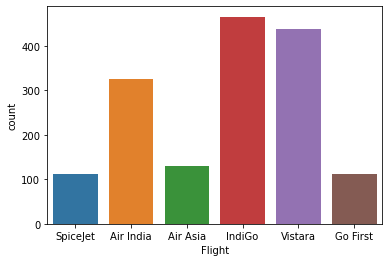

In [277]:
sns.countplot(flight['Flight'])

<AxesSubplot:xlabel='Day', ylabel='count'>

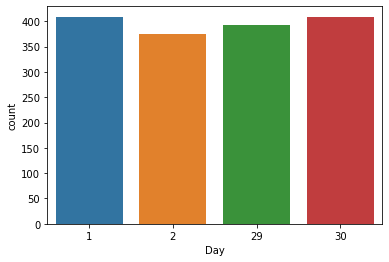

In [290]:
sns.countplot(flight['Day'])

<AxesSubplot:xlabel='Source', ylabel='count'>

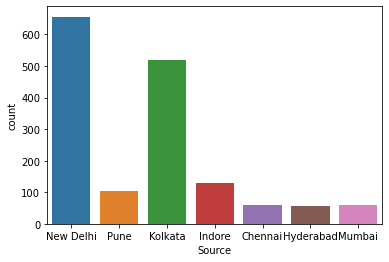

In [291]:
sns.countplot(flight['Source'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

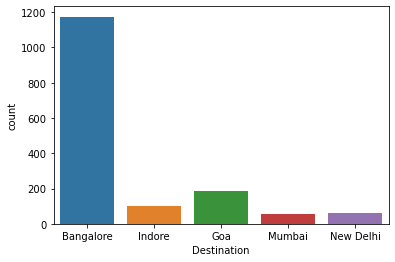

In [292]:
sns.countplot(flight['Destination'])

**- Bivariate Analysis.**

<AxesSubplot:xlabel='Source', ylabel='Destination'>

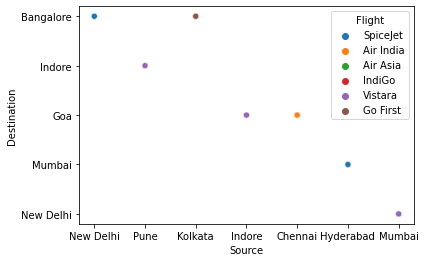

In [293]:
sns.scatterplot(x = 'Source', y = 'Destination', data = flight, hue = 'Flight')

<AxesSubplot:xlabel='Day', ylabel='Flight'>

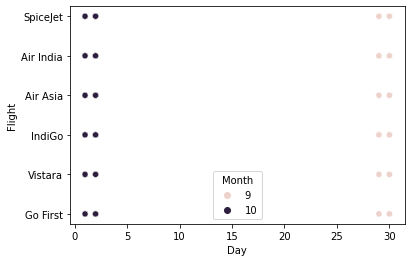

In [289]:
sns.scatterplot(x = flight['Day'], y = flight['Flight'], hue = flight['Month'])

<AxesSubplot:xlabel='Price', ylabel='Flight'>

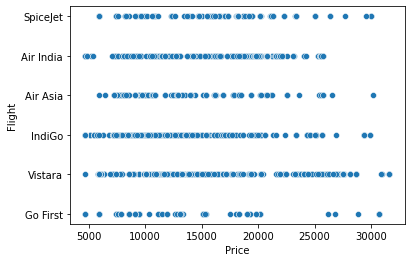

In [139]:
sns.scatterplot(x = 'Price', y = 'Flight', data = flight)

<AxesSubplot:xlabel='Source', ylabel='Price'>

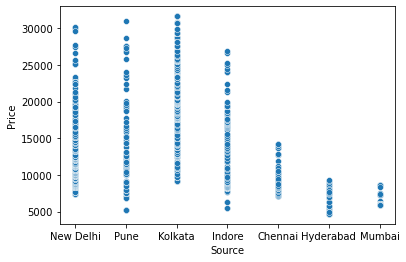

In [294]:
sns.scatterplot(x = 'Source', y = 'Price', data = flight)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

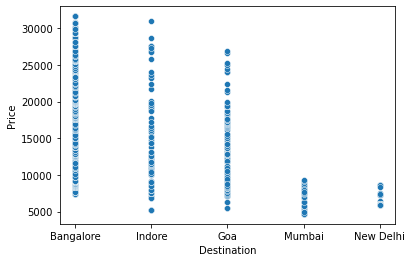

In [295]:
sns.scatterplot(x = 'Destination', y = 'Price', data = flight)

<AxesSubplot:xlabel='Stops', ylabel='Price'>

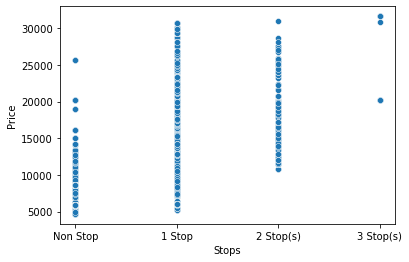

In [296]:
sns.scatterplot(x = 'Stops', y = 'Price', data = flight)

<AxesSubplot:xlabel='Meal', ylabel='Price'>

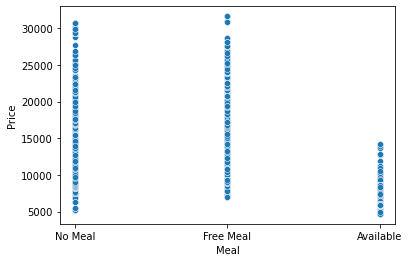

In [297]:
sns.scatterplot(x = 'Meal', y = 'Price', data = flight)

## Encoding

In [298]:
lb = LabelEncoder()

In [299]:
flight['Flight'] = lb.fit_transform(flight['Flight'])
flight['Meal'] = lb.fit_transform(flight['Meal'])

In [300]:
flight['Stops'] = flight['Stops'].replace('Non Stop',0)
flight['Stops'] = flight['Stops'].replace('1 Stop',1)
flight['Stops'] = flight['Stops'].replace('2 Stop(s)',2)
flight['Stops'] = flight['Stops'].replace('3 Stop(s)',3)

In [301]:
flight['Source'] = flight['Source'].replace('Chennai',0)
flight['Source'] = flight['Source'].replace('Hyderabad',1)
flight['Source'] = flight['Source'].replace('Indore',2)
flight['Source'] = flight['Source'].replace('Kolkata',3)
flight['Source'] = flight['Source'].replace('Mumbai',4)
flight['Source'] = flight['Source'].replace('New Delhi',5)
flight['Source'] = flight['Source'].replace('Pune',6)

In [302]:
flight['Destination'] = flight['Destination'].replace('Indore',2)
flight['Destination'] = flight['Destination'].replace('New Delhi',5)
flight['Destination'] = flight['Destination'].replace('Mumbai',4)
flight['Destination'] = flight['Destination'].replace('Bangalore',7)
flight['Destination'] = flight['Destination'].replace('Goa',8)

In [303]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583 entries, 0 to 1630
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Flight       1583 non-null   int64
 1   Source       1583 non-null   int64
 2   Destination  1583 non-null   int64
 3   Stops        1583 non-null   int64
 4   Meal         1583 non-null   int64
 5   Price        1583 non-null   int64
 6   Month        1583 non-null   int64
 7   Day          1583 non-null   int64
 8   Dep_hr       1583 non-null   int64
 9   Dep_min      1583 non-null   int64
 10  Arr_hr       1583 non-null   int64
 11  Arr_min      1583 non-null   int64
 12  Dur_hour     1583 non-null   int64
 13  Dur_min      1583 non-null   int64
dtypes: int64(14)
memory usage: 250.0 KB


## Normal Distribution:

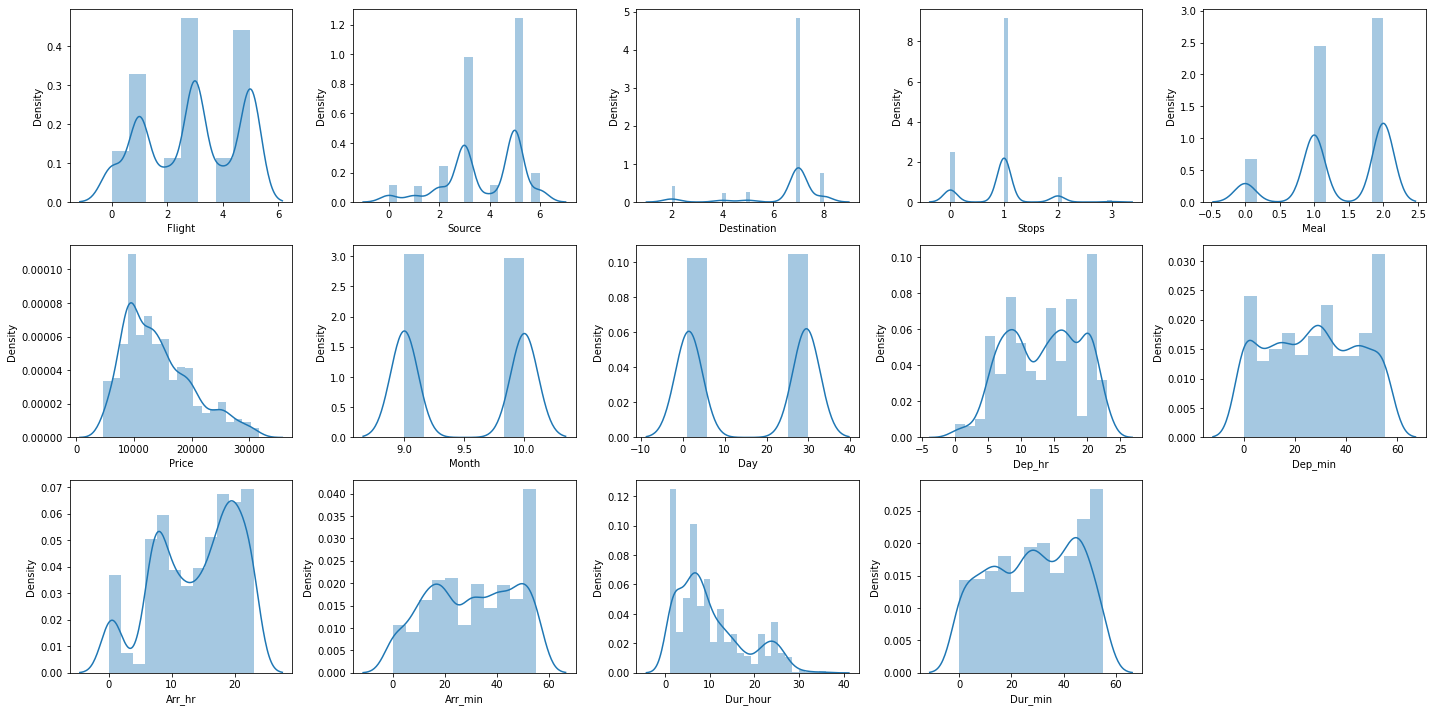

In [304]:
plt.figure(figsize=(20,10))
plotnumber = 1

for column in flight:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(flight[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

## Outliers:

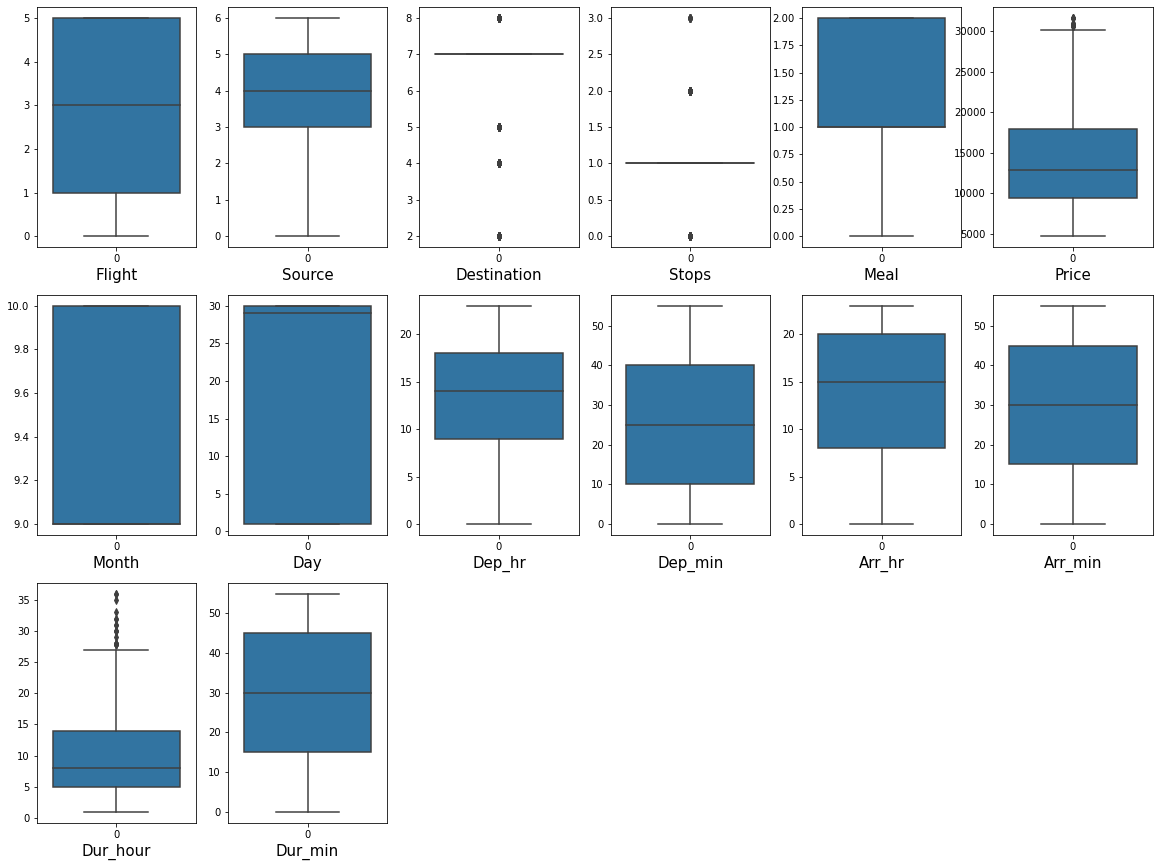

In [305]:
plt.figure(figsize = (20,15))
graph = 1
for column in flight:
    if graph <= 18:
        plt.subplot(3,6,graph)
        ax = sns.boxplot(data = flight[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

    As most of the columns are categorical columns so the normal distribution. and outliers can be considered in our dataset.

## Correlation:

In [306]:
df = flight.corr()

<AxesSubplot:>

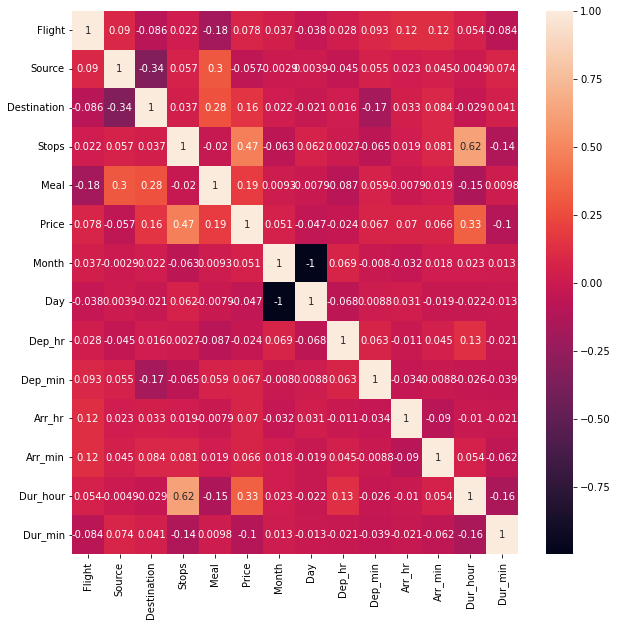

In [307]:
plt.figure(figsize = (10,10))
sns.heatmap(df,annot= True)

    There is no multicolinearity problem present in our dataset.

## Final Dataset

In [329]:
flight

,Flight,Source,Destination,Stops,Meal,Price,Month,Day,Dep_hr,Dep_min,Arr_hr,Arr_min,Dur_hour,Dur_min
0,4,5,7,0,2,7419,9,29,20,0,22,30,2,30
1,4,5,7,0,2,7419,9,29,6,5,8,55,2,50
2,1,5,7,0,1,7425,9,29,21,15,0,5,2,50
3,0,5,7,1,2,7710,9,29,15,30,21,0,5,30
4,0,5,7,1,2,7710,9,29,8,0,14,15,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,5,4,5,1,0,6080,10,2,20,0,22,0,26,0
1627,5,4,5,0,0,5943,10,2,6,30,8,35,2,5
1628,5,4,5,0,0,5943,10,2,7,30,9,35,2,5
1629,5,4,5,0,0,5943,10,2,21,55,0,10,2,15


## Best Features Selection

**- Seperating Features & Target columns.**

In [308]:
x = flight.drop('Price', axis = 1)
y = flight.Price

**- Applying SelectKBest & F_classif for the feature selection.**

In [310]:
best_feature = SelectKBest(score_func = f_classif, k =13)
fit = best_feature.fit(x,y)

In [311]:
brt_score = pd.DataFrame(fit.scores_)
brt_column = pd.DataFrame(x.columns)

In [312]:
feature_score = pd.concat([brt_column,brt_score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(13,'Scores')

,Feature Name,Scores
2,Destination,366.564577
1,Source,306.609095
4,Meal,78.067349
0,Flight,19.863913
3,Stops,16.705890
11,Dur_hour,7.650990
5,Month,5.892087
6,Day,5.792600
8,Dep_min,2.317931
12,Dur_min,1.879390


**- Graph of features with target:**

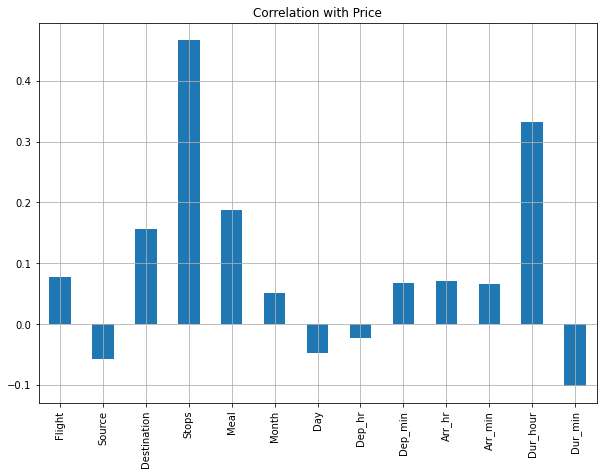

In [313]:
x.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation with Price')
plt.show()

    Every columns is contributing for the target column,so every column is important.

## Model Building.

**- Scaling the features.**

In [314]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**- Train Test Split.**

In [315]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 90)

**- Function for Training & Testing.**

In [316]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))
        print('Mean Absolute Error:',mean_absolute_error(y_test,pred))

**- Model Instantiating.**

In [317]:
ada = AdaBoostRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
knn = KNeighborsRegressor()
svr = SVR()

**AdaBoost Regressor**

In [318]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.4710115496860604

 ----- Test Result ----- 

R2 Score: 0.48432421487116273
Mean Absolute Error: 3580.7221569013077


**RandomForest Regressor**

In [319]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.972152492366599

 ----- Test Result ----- 

R2 Score: 0.7732791262555745
Mean Absolute Error: 1929.7169304052427


**GradientBoosting Regressor**

In [320]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.7523441544555572

 ----- Test Result ----- 

R2 Score: 0.6790282222829878
Mean Absolute Error: 2569.0404617542354


**KNeighbors Regressor**

In [321]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.67846335421372

 ----- Test Result ----- 

R2 Score: 0.5342227736714678
Mean Absolute Error: 3072.572222222222


**SupperVector Regressor**

In [322]:
svr.fit(x_train,y_train)
score(svr, x_train,x_test,y_train,y_test,train = True)
score(svr, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: -0.037789904515184825

 ----- Test Result ----- 

R2 Score: -0.05234550989683595
Mean Absolute Error: 5067.142915964009


    Results: RandomForest Regressor is giving the best accuracy score.

### Hyperparmeter Tuning

In [251]:
param = {"n_estimators":[20, 100, 200],
           "max_depth":[None, 1, 2, 5],
           "max_features":[0.5, 1, "auto", "sqrt"],
           "min_samples_split":[ 2, 5, 10],
           "min_samples_leaf":[1, 2, 3, 5]}

In [252]:
grid = GridSearchCV(rf, param_grid = param)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [323]:
rf_hyp = RandomForestRegressor(max_depth = None, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)

In [324]:
rf_hyp.fit(x_train,y_train)
score(rf_hyp, x_train,x_test,y_train,y_test,train = True)
score(rf_hyp, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9730630268616542

 ----- Test Result ----- 

R2 Score: 0.7819160583707626
Mean Absolute Error: 1917.047600378788


    Post-tuning & Pre-tuning results are almost equal.

**Saving the model.**

In [328]:
filename = 'flight_pre.pickle'
pickle.dump(rf_hyp, open(filename, 'wb'))